In [1]:
from hossam import load_data

In [2]:
origin=load_data('father-son')
print('\n===== 데이터 크기 확인 =====')
print(f'데이터셋 크기 : {origin.shape}')
print(f'행 개수 : {origin.shape[0]}개')
print(f'열 개수 : {origin.shape[1]}개')
print('\n===== 타입 확인 =====')
print(origin.info())
origin.head()

[data] https://data.hossam.kr/data/lab12_/father-son.xlsx
[desc] 아버지와 아들의 키를 조사한 데이터 (출처: https://www.kaggle.com/datasets/aungdev/pearson-dataset-heights-of-fathers-and-their-sons)

field    description
-------  -------------------
fheight  아버지의 키(Inches)
sheight  아들의 키(Inches)


===== 데이터 크기 확인 =====
데이터셋 크기 : (1078, 2)
행 개수 : 1078개
열 개수 : 2개

===== 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fheight  1078 non-null   float64
 1   sheight  1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB
None


,fheight,sheight
0,65.04851,59.77827
1,63.25094,63.21404
2,64.95532,63.34242
3,65.75250,62.79238
4,61.13723,64.28113


                            OLS Regression Results                            
Dep. Variable:                sheight   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     361.2
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           1.12e-69
Time:                        11:08:57   Log-Likelihood:                -2488.7
No. Observations:                1078   AIC:                             4981.
Df Residuals:                    1076   BIC:                             4991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.8866      1.832     18.493      0.0

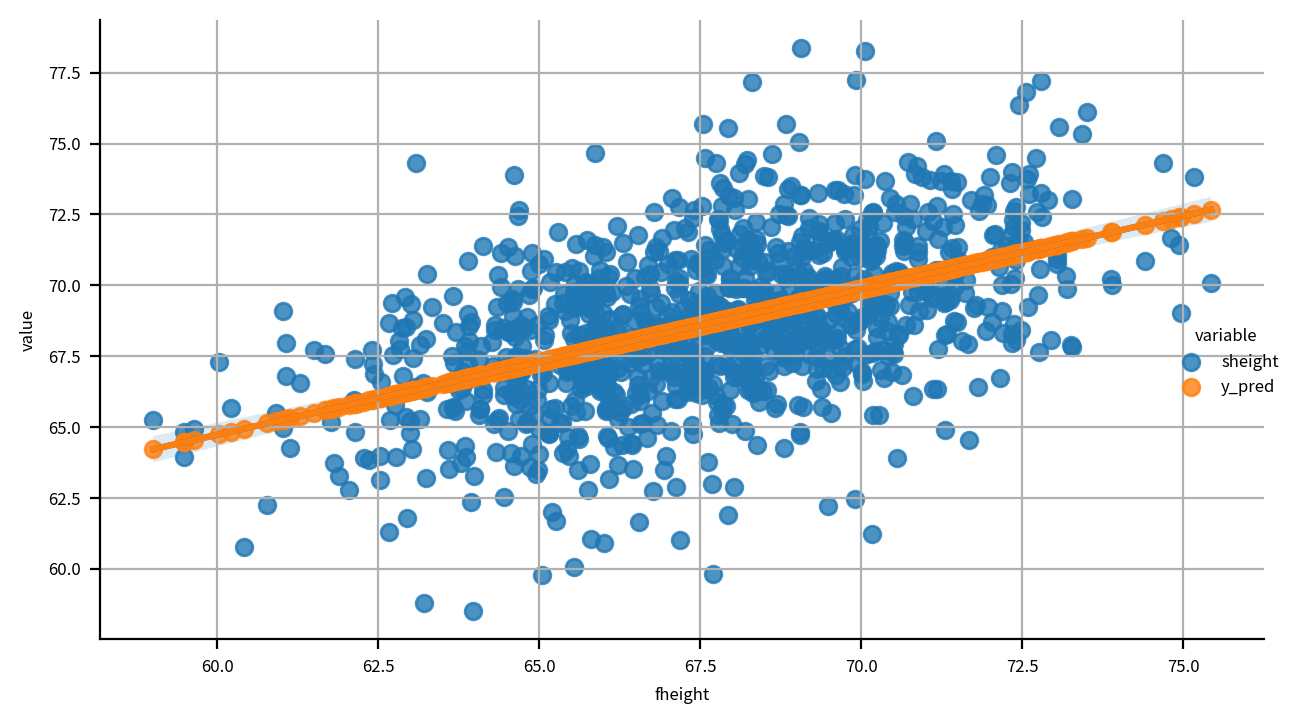

In [4]:
# 데이터 입력
xname='fheight'
yname='sheight'

# 패키지 참조
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_reset
from scipy.stats import zscore, pearsonr, spearmanr

# 그래프 초기화
my_dpi=200
font_path='../NotoSansKR-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop=fm.FontProperties(fname=font_path)
font_name=font_prop.get_name()
plt.rcParams['font.family']=font_name
plt.rcParams['font.size']=6
plt.rcParams['axes.unicode_minus']=False

# 단순선형회귀분석
x=origin[[xname]]
y=origin[yname]
X=sm.add_constant(x)
model=sm.OLS(y,X)
fit=model.fit()
print(fit.summary())

# 그래프 시각화
df=origin.copy()
df['y_pred']=fit.predict(X)
df_melt=df.melt(
    id_vars=xname,
    value_vars=[yname,'y_pred'],
    var_name='variable',
    value_name='value'
)
width_px=1280
height_px=720
figsize=(width_px/my_dpi, height_px/my_dpi)
g=sb.lmplot(data=df_melt, x=xname, y='value', hue='variable')
g.fig.set_dpi(my_dpi)
g.fig.set_figwidth(figsize[0])
g.fig.set_figheight(figsize[1])
plt.grid()
plt.tight_layout()
plt.show()
plt.close()

sheight를 종속변수로, fheight를 독립변수로 한 단순회귀분석 결과, 모형은 통계적으로 유의하였다.  
F(1, 1076) = 361.2, p < 0.05, R² = 0.251  
즉, fheight는 sheight의 약 25.1%를 설명하는 것으로 나타났다.  

fheight의 회귀계수는 β = 0.514으로 나타났으며, 이는 sheight에 유의한 영향을 미쳤다.  
t(1076) = 19.006, p < 0.05  
즉, fheight가 1 증가할 때 sheight는 평균적으로 0.514 증가하는 것으로 해석된다.  